## Import Required Libraries
Import all necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, root_mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, r2_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load and Inspect Data
Read the dataset and display its head and info to understand the structure and types of data.

In [2]:
df = pd.read_csv('student_career_performance.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       5050 non-null   object 
 1   Hours_Study      4957 non-null   float64
 2   Sleep_Hours      4961 non-null   float64
 3   Internships      5050 non-null   int64  
 4   Projects         5050 non-null   int64  
 5   CGPA             4946 non-null   float64
 6   Placement_Score  5050 non-null   float64
 7   Placed           5050 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 315.8+ KB


## Handle Missing Values
Fill missing values in key columns with their median values to ensure data completeness.

In [3]:
for col in ['Hours_Study', 'Sleep_Hours', 'Internships', 'Projects', 'CGPA', 'Placement_Score', 'Placed']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       5050 non-null   object 
 1   Hours_Study      5050 non-null   float64
 2   Sleep_Hours      5050 non-null   float64
 3   Internships      5050 non-null   int64  
 4   Projects         5050 non-null   int64  
 5   CGPA             5050 non-null   float64
 6   Placement_Score  5050 non-null   float64
 7   Placed           5050 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 315.8+ KB


C:\Users\ahite\AppData\Local\Temp\ipykernel_14680\3485050254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace =True)
C:\Users\ahite\AppData\Local\Temp\ipykernel_14680\3485050254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

## Data Cleaning
Remove outliers and inconsistent data based on logical constraints for study hours, sleep hours, CGPA, and placement scores.

In [4]:
df = df[df['Hours_Study'] + df['Sleep_Hours'] <= 24]
df = df[df['CGPA'] <= 10]
df = df[df['Hours_Study'] <= 24]
df = df[df['Sleep_Hours'] <= 24]
df = df[df['Hours_Study'] >= 0]
df = df[~((df['Placed'] == 1) & (df['Placement_Score'] == 0))]
df = df[~((df['Placed'] == 0) & (df['Placement_Score'] > 99))]
df.describe()

,Hours_Study,Sleep_Hours,Internships,Projects,CGPA,Placement_Score,Placed
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000
mean,5.687782,7.188548,1.840815,3.155682,7.796436,99.667287,0.994964
std,2.062737,1.207764,1.369628,1.755057,1.150486,2.382491,0.070795
min,0.100000,2.500000,0.000000,0.000000,3.660000,51.900000,0.000000
25%,4.400000,6.400000,1.000000,2.000000,7.010000,100.000000,1.000000
50%,5.600000,7.200000,2.000000,3.000000,7.850000,100.000000,1.000000
75%,6.800000,8.000000,3.000000,4.000000,8.615000,100.000000,1.000000
max,17.200000,11.300000,8.000000,11.000000,10.000000,100.000000,1.000000


## Prepare Features and Target for Classification
Separate the target variable (`Placed`) and drop unnecessary columns for classification tasks.

In [5]:
y = df['Placed']
df.drop('Student_ID', axis=1, inplace=True)
X = df.drop(columns=['Placed'])
df.describe()
df

,Hours_Study,Sleep_Hours,Internships,Projects,CGPA,Placement_Score,Placed
0,6.4,6.7,1,1,6.39,100.0,1
1,5.3,6.7,0,3,7.05,100.0,1
2,6.7,5.0,0,3,6.55,100.0,1
3,8.2,6.8,1,3,6.59,100.0,1
4,5.1,8.1,2,4,6.94,100.0,1
...,...,...,...,...,...,...,...
5045,7.2,4.7,1,2,7.78,100.0,1
5046,2.5,6.3,2,3,7.87,100.0,1
5047,2.1,6.4,0,2,6.28,98.6,1
5048,1.7,10.6,1,3,8.50,100.0,1


## Split Data for Classification
Split the data into training and testing sets for classification models.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Logistic Regression Model
Fit a logistic regression model to predict placement and evaluate its accuracy.

In [7]:
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Test Accuracy: {logistic_accuracy:.4f}')

Logistic Regression Test Accuracy: 0.9923


## Logistic Regression Metrics
Display precision, recall, F1 score, and ROC AUC for the logistic regression model.

In [8]:
print(f'Logistic Regression Test Accuracy: {logistic_accuracy:.4f}')
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_logistic):.2f}")
print(f"ROC AUC:   {roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:,1]):.2f}")

Logistic Regression Test Accuracy: 0.9923
Precision: 1.00
Recall:    1.00
F1 Score:  1.00
ROC AUC:   0.97


## Confusion Matrix for Logistic Regression
Visualize the confusion matrix for the logistic regression predictions.

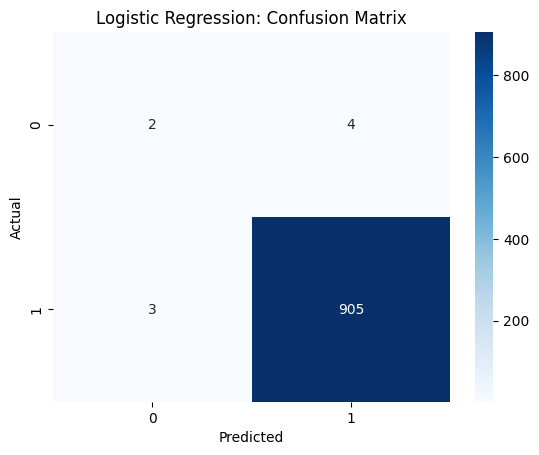

In [9]:
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

## Data Description
Show descriptive statistics of the cleaned dataset.

In [10]:
df.describe()   

,Hours_Study,Sleep_Hours,Internships,Projects,CGPA,Placement_Score,Placed
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000
mean,5.687782,7.188548,1.840815,3.155682,7.796436,99.667287,0.994964
std,2.062737,1.207764,1.369628,1.755057,1.150486,2.382491,0.070795
min,0.100000,2.500000,0.000000,0.000000,3.660000,51.900000,0.000000
25%,4.400000,6.400000,1.000000,2.000000,7.010000,100.000000,1.000000
50%,5.600000,7.200000,2.000000,3.000000,7.850000,100.000000,1.000000
75%,6.800000,8.000000,3.000000,4.000000,8.615000,100.000000,1.000000
max,17.200000,11.300000,8.000000,11.000000,10.000000,100.000000,1.000000


## Train Random Forest Classifier
Fit a random forest classifier and evaluate its accuracy.

In [11]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=100)
rf_clf.fit(X_train, y_train)
y_rf_clf_pred = rf_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_test, y_rf_clf_pred)
print(f'Random Forest Classifier Test Accuracy: {rf_clf_accuracy:.4f}')

Random Forest Classifier Test Accuracy: 0.9934


## Feature Importance (Random Forest)
Visualize the importance of each feature as determined by the random forest classifier.

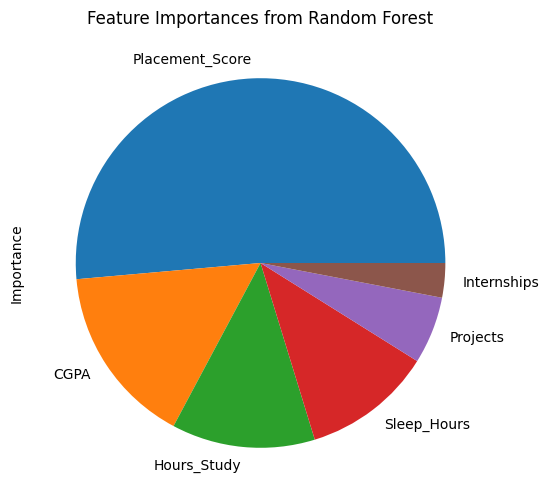

In [12]:
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='pie')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()

## Prepare Features and Target for Regression
Separate the target variable (`Placement_Score`) and features for regression tasks.

In [13]:
y1 = df['Placement_Score']
x1 = df.drop(columns=['Placement_Score'])

## Split Data for Regression
Split the data into training and testing sets for regression models.

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

## Train Linear Regression Model
Fit a linear regression model to predict placement scores and evaluate its performance.

In [15]:
Linear_model = LinearRegression()
Linear_model.fit(X1_train, y1_train)
y1_pred_Linear = Linear_model.predict(X1_test)
y1_pred_Linear = np.clip(y1_pred_Linear, 0, 100)
print(f"Mean Absolute Error: {mean_absolute_error(y1_test, y1_pred_Linear):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y1_test, y1_pred_Linear):.4f}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y1_test, y1_pred_Linear):.4f}")
print("R2 score is not applicabe here as varience in our data is very less")

Mean Absolute Error: 0.6463
Mean Squared Error: 6.8651
Root Mean Squared Error: 2.6201
R2 score is not applicabe here as varience in our data is very less


## Linear Regression: Actual vs Predicted
Visualize the relationship between actual and predicted placement scores.

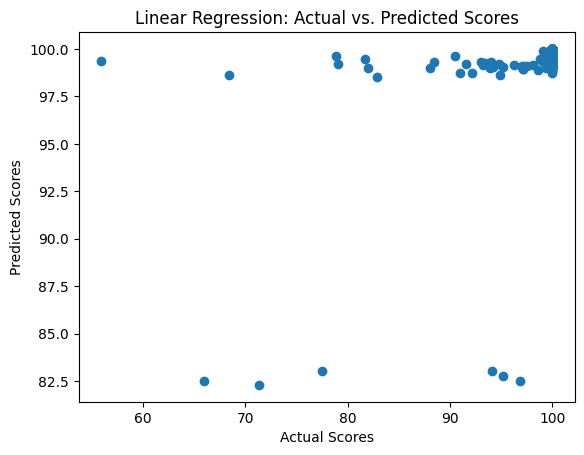

In [16]:
plt.scatter(y1_test, y1_pred_Linear)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Linear Regression: Actual vs. Predicted Scores")
plt.show()

## Compare Linear and Logistic Regression Predictions
Plot and compare the predictions from linear and logistic regression models.

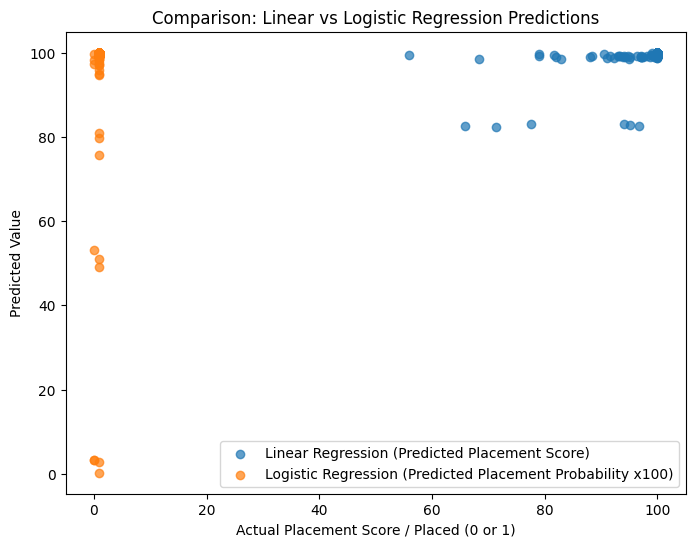

Comparison plot shows how Linear Regression predicts Placement Scores (0-100) while Logistic Regression predicts Placement Probability (0-1 scaled to 0-100).
the logistic and linear regression models are are matching with few exeptions


In [ ]:



plt.figure(figsize=(8,6))
plt.scatter(y1_test, y1_pred_Linear, label='Linear Regression (Predicted Placement Score)', alpha=0.7)
plt.scatter(y_test, logistic_model.predict_proba(X_test)[:,1]*100, label='Logistic Regression (Predicted Placement Probability x100)', alpha=0.7)
plt.xlabel('Actual Placement Score / Placed (0 or 1)')
plt.ylabel('Predicted Value')
plt.title('Comparison: Linear vs Logistic Regression Predictions')
plt.legend()
plt.show()
print("Comparison plot shows how Linear Regression predicts Placement Scores (0-100) while Logistic Regression predicts Placement Probability (0-1 scaled to 0-100).\n")
print("the logistic and linear regression models are are matching with few exeptions")

## Key Insights
Summarize the main findings from the analysis and modeling.

In [18]:
print("Insight 1: 'Placement_Score' is the most important feature for predicting placement (Random Forest importance = {:.2f}).".format(feature_importance_series['Placement_Score']))
print("Insight 2: Both Logistic Regression and Random Forest models achieve very high accuracy (Logistic: {:.2%}, Random Forest: {:.2%}).".format(logistic_accuracy, rf_clf_accuracy))
print("Insight 3: Linear Regression predictions for Placement_Score are tightly clustered near 100 (mean={:.2f}, std={:.2f}), indicating low variance in the target.".format(np.mean(y1_pred_Linear), np.std(y1_pred_Linear)))


Insight 1: 'Placement_Score' is the most important feature for predicting placement (Random Forest importance = 0.51).
Insight 2: Both Logistic Regression and Random Forest models achieve very high accuracy (Logistic: 99.23%, Random Forest: 99.34%).
Insight 3: Linear Regression predictions for Placement_Score are tightly clustered near 100 (mean=99.59, std=1.40), indicating low variance in the target.
